In [ ]:
!pip install tabulate
!pip install tensorflow_text
#!pip install tensorflow
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
import tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installati

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')





In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data=pd.read_csv("drive/My Drive/Depressed1.csv", encoding='mac-roman')
# #data=pd.read_csv("drive/My Drive/IPD_Reddit_Dataset.csv", encoding='mac-roman')


# data.head()

# print(data)
data=pd.read_csv('IPD_Reddit_Dataset.csv',encoding='mac_roman')
data.head()
print(data.shape)

(4738, 2)


In [ ]:
X = data.drop('is_depression', axis=1)
y=data['is_depression'].values
display(data.dtypes)

clean_text       object
is_depression     int64
dtype: object

In [ ]:

ss = X.clean_text.values
lenws = []
lencs = []
c = 0
for i in ss:
  ls = i.split(" ")
  lenws.append(len(ls))
  # if len(ls)==1:
  #   print(i)
  #   print(c)
  #   print("End")
  j = 512
  if len(ls)>j:
    c+=1
  lencs.append(len(i))


print(max(lenws),min(lenws))
print(max(lencs), min(lencs))
print(f"length of words greater than {j} is of : {c}")


3054 1
16495 1
length of words greater than 512 is of : 110


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['clean_text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make limmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)

    # removing mails
    for r in regexes_to_remove:
        X['clean_text'][i] = re.sub(r, '', review)

In [ ]:
import pandas as pd

# Load the dataset from the CSV file
# data = pd.read_csv('your_dataset.csv')

# Separate the data into two classes based on the label column
class_0_data = data[data['is_depression'] == 0]
class_1_data = data[data['is_depression'] == 1]

# Randomly sample 800 rows from each class
class_0_sampled = class_0_data.sample(n=800, random_state=40,replace=True)
class_1_sampled = class_1_data.sample(n=800, random_state=40,replace=True)

# Concatenate the sampled data from both classes
sampled_data = pd.concat([class_0_sampled, class_1_sampled])

# Shuffle the rows of the sampled data
sampled_data = sampled_data.sample(frac=1, replace=True, random_state=40)
X = sampled_data.drop('is_depression', axis=1)
y=sampled_data ['is_depression']
# Now you can use the sampled_data for training your NLP model

In [ ]:

ss = sampled_data.clean_text.values
lenws = []
lencs = []
c = 0
for i in ss:
  ls = i.split(" ")
  lenws.append(len(ls))
  # if len(ls)==1:
  #   print(i)
  #   print(c)
  #   print("End")
  j = 256
  if len(ls)>j:
    c+=1
  lencs.append(len(i))


print(max(lenws),min(lenws))
print(max(lencs), min(lencs))
print(f"length of words greater than {j} is of : {c}")

1576 1
10989 1
length of words greater than 256 is of : 122


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

In [ ]:
print(X.shape)

(1600, 1)


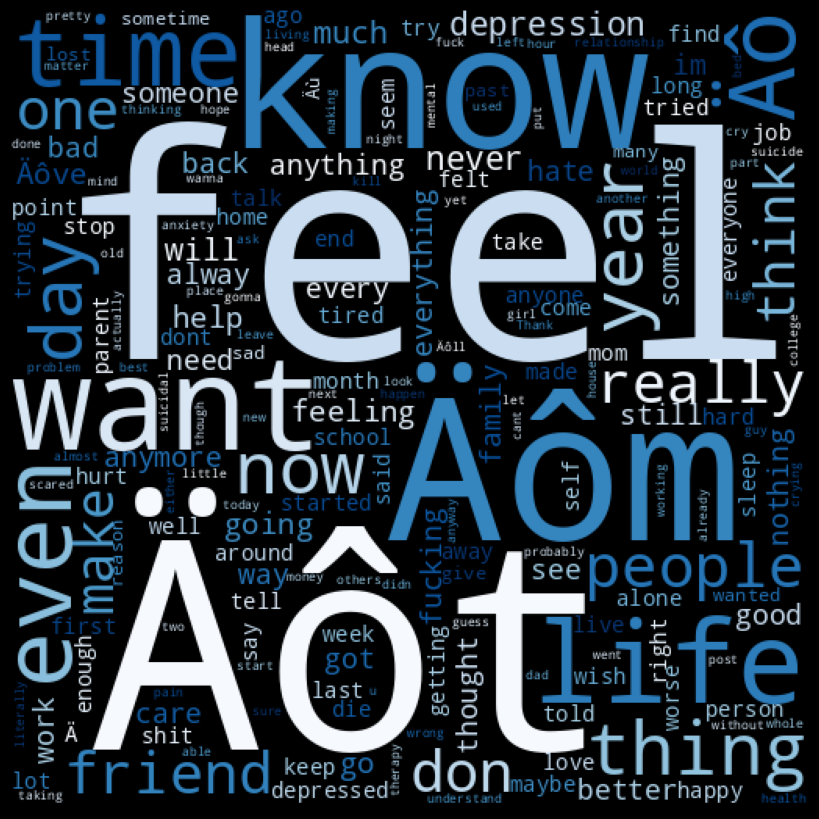

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(data[data['is_depression'] == 1] ['clean_text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

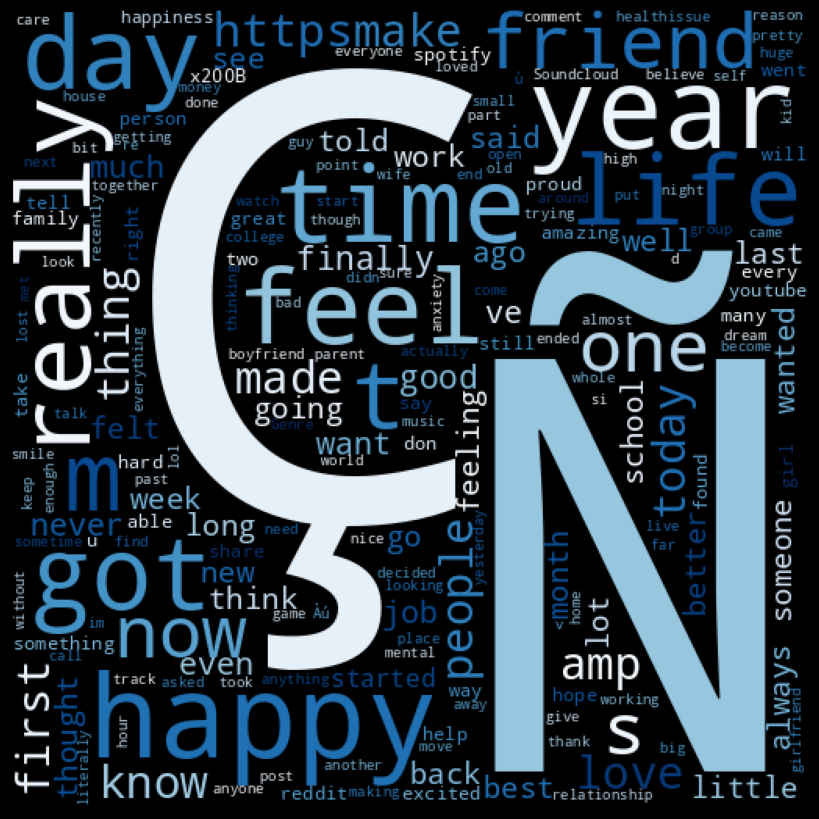

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
depressive_words = ' '.join(list(data[data['is_depression'] == 0]['clean_text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# top words
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
#let's extend the list to add "im" as we found it was not originally in the stopword list
stopwords_list.append("im")

word_counts = { 1: [],  #positive
                0: []}  #negative

pattern = re.compile('[^\w ]')
for clean_text, is_depression in zip(data['clean_text'], data['is_depression']):
    clean_text = re.sub(pattern, '', clean_text).lower().split()
    clean_text = [word for word in clean_text if word not in stopwords_list]
    word_counts[is_depression].extend(clean_text)

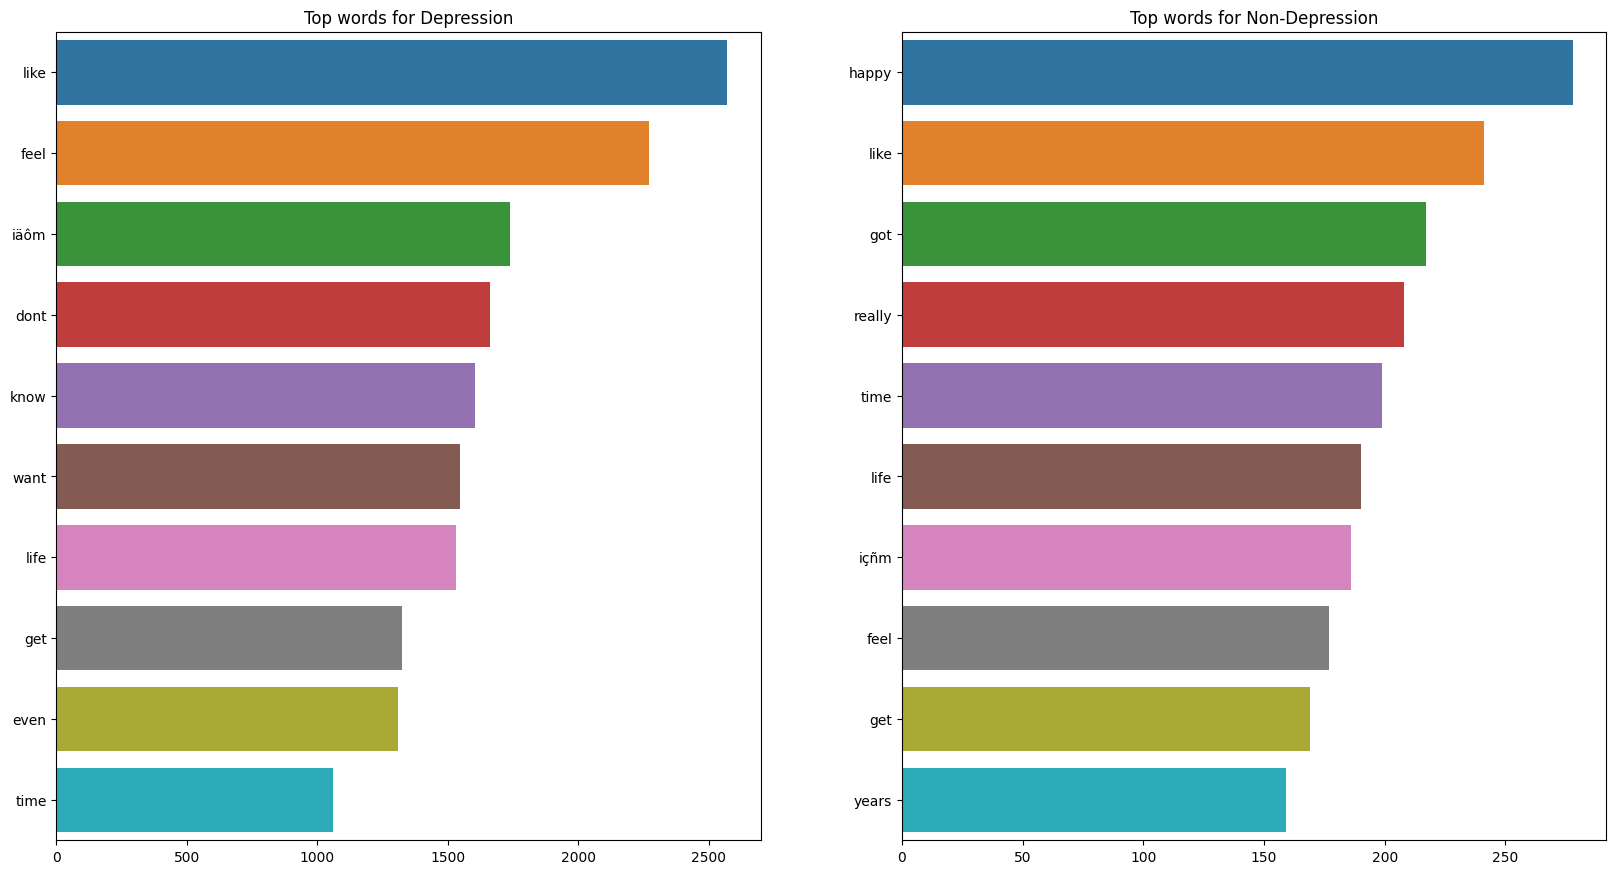

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20,10.5))
def changename(is_depression):
    if is_depression == 1:
        return ("Depression")
    else:
        return ("Non-Depression")
for axis, (target, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:10]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Top words for {changename(target)}')
plt.show()
# sns.figure.savefig("output.png")

# **Feature Extraction**

# TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,1))
tfidf_vectorizer_n12 = TfidfVectorizer(max_features=10000, ngram_range=(2,2))


X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['clean_text'])
X_tfidf_test = tfidf_vectorizer.transform(X_test['clean_text'])

X_tfidf_train_n12= tfidf_vectorizer_n12.fit_transform(X_train['clean_text'])
X_tfidf_test_n12=tfidf_vectorizer_n12.transform(X_test['clean_text'])

In [ ]:
print(X_tfidf_test)

  (0, 5265)	0.06024733869111196
  (0, 5229)	0.060813485484913395
  (0, 5177)	0.04702650729720304
  (0, 5155)	0.11457122364887813
  (0, 4872)	0.13801775669234073
  (0, 4866)	0.10490893648707746
  (0, 4837)	0.059520244722294474
  (0, 4818)	0.03668703803770689
  (0, 4783)	0.09208660563991886
  (0, 4696)	0.11457122364887813
  (0, 4600)	0.11457122364887813
  (0, 4543)	0.05570310033695932
  (0, 4507)	0.07028498694583252
  (0, 4473)	0.10490893648707746
  (0, 4418)	0.061006402913713065
  (0, 4388)	0.14543261292774864
  (0, 4369)	0.11457122364887813
  (0, 4352)	0.15140115295938833
  (0, 4075)	0.10056975909733218
  (0, 3859)	0.04993441198911186
  (0, 3498)	0.11457122364887813
  (0, 3353)	0.04764164366142645
  (0, 3345)	0.05882253645188125
  (0, 3332)	0.04660016637050496
  (0, 3311)	0.051651695112911955
  :	:
  (479, 4128)	0.48302871545775333
  (479, 4091)	0.1503003049110761
  (479, 3862)	0.11800062769531079
  (479, 3848)	0.1312092812944001
  (479, 3417)	0.1312092812944001
  (479, 3345)	0.0938334

In [ ]:
print(X_tfidf_train_n12)

  (0, 4871)	0.041955232008773866
  (0, 944)	0.041955232008773866
  (0, 9214)	0.041955232008773866
  (0, 6147)	0.041955232008773866
  (0, 8017)	0.041955232008773866
  (0, 1290)	0.030368423031383204
  (0, 8981)	0.026513076167342737
  (0, 4335)	0.040544368833105825
  (0, 1465)	0.036827987356809415
  (0, 5076)	0.025985881718355905
  (0, 4916)	0.029215663881069012
  (0, 7659)	0.041955232008773866
  (0, 645)	0.03939160968279164
  (0, 7360)	0.041955232008773866
  (0, 2369)	0.041955232008773866
  (0, 475)	0.041955232008773866
  (0, 1819)	0.041955232008773866
  (0, 1305)	0.041955232008773866
  (0, 2403)	0.041955232008773866
  (0, 3862)	0.041955232008773866
  (0, 3074)	0.041955232008773866
  (0, 4258)	0.041955232008773866
  (0, 2814)	0.03757269069574657
  (0, 9846)	0.041955232008773866
  (0, 6666)	0.041955232008773866
  :	:
  (1118, 3377)	0.07534491035958937
  (1118, 7019)	0.08397326464044351
  (1118, 2186)	0.09828664904189054
  (1118, 4027)	0.09664876178223013
  (1118, 8359)	0.09828664904189054

# Bag of Words

In [ ]:
vectorizer = CountVectorizer()

X_bow_train = vectorizer.fit_transform(X_train['clean_text'])
X_bow_test = vectorizer.transform(X_test['clean_text'])

# **Feature Selection**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# We Can select any model but linearSVC has l1 norm penality which deals with sparse
lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False,random_state=40)
lsvc.fit(X_tfidf_train, y_train)

# This function select the best features that has high weigh
fs = SelectFromModel(lsvc, prefit=True)
# This function redeuce X to the selected features
X_selection = fs.transform(X_tfidf_train)
X_test_selection = fs.transform(X_tfidf_test)


lsvc.fit(X_tfidf_train_n12, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_n12 = fs_n12.transform(X_tfidf_train_n12)
X_test_selection_n12 = fs_n12.transform(X_tfidf_test_n12)

lsvc.fit(X_bow_train, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_bow = fs_n12.transform(X_bow_train)
X_test_selection_bow = fs_n12.transform(X_bow_test)

# **Linear SVC**

In [ ]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False,random_state=40)
lsvc.fit(X_selection, y_train)
y_predict_tfidf = lsvc.predict(X_test_selection)

lsvc.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = lsvc.predict(X_test_selection_n12)

lsvc.fit(X_selection_bow,y_train)
y_predict_bow = lsvc.predict(X_test_selection_bow)


linear_svm_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
linear_svm_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
linear_svm_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)


tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)



In [ ]:
data1 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',linear_svm_tfidf_results[0][0],linear_svm_tfidf_n12_results[0][0],linear_svm_bow_results[0][0]],
         ['recall',linear_svm_tfidf_results[1][0],linear_svm_tfidf_n12_results[1][0],linear_svm_bow_results[1][0]],
         ['F1-score',linear_svm_tfidf_results[2][0],linear_svm_tfidf_n12_results[2][0],linear_svm_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data1,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.937743 │          0.955357 │       0.95122  │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.926923 │          0.823077 │       0.9      │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.932302 │          0.884298 │       0.924901 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.927083 │          0.883333 │       0.920833 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,random_state=40)
clf.fit(X_selection, y_train)
y_predict_tfidf_2 = clf.predict(X_test_selection)

clf.fit(X_selection_n12, y_train)
y_predict_tfidf_n12_2 = clf.predict(X_test_selection_n12)

clf.fit(X_selection_bow, y_train)
y_predict_bow_2 = clf.predict(X_test_selection_bow)

RandomForest_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_2)
RandomForest_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12_2)
RandomForest_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_2)

RandomForest_tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf_2)
RandomForest_tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12_2)
RandomForest_bow_acc= accuracy_score(y_test, y_predict_bow_2)



In [ ]:
data2 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',RandomForest_tfidf_results[0][0],RandomForest_tfidf_n12_results[0][0],RandomForest_bow_results[0][0]],
         ['recall',RandomForest_tfidf_results[1][0],RandomForest_tfidf_n12_results[1][0],RandomForest_bow_results[1][0]],
         ['F1-score',RandomForest_tfidf_results[2][0],RandomForest_tfidf_n12_results[2][0],RandomForest_bow_results[2][0]],
        ['accuracy',RandomForest_tfidf_acc,RandomForest_tfidf_n12_acc, RandomForest_bow_acc]]

print(tabulate(data2,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.918367 │          0.924051 │       0.919831 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.865385 │          0.561538 │       0.838462 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.891089 │          0.698565 │       0.877264 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.885417 │          0.7375   │       0.872917 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=40)
lr.fit(X_selection, y_train)
y_predict_tfidf = lr.predict(X_test_selection)

lr.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = lr.predict(X_test_selection_n12)

lr.fit(X_selection_bow,y_train)
y_predict_bow = lr.predict(X_test_selection_bow)


lr_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
lr_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
lr_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)

tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)


In [ ]:
data3 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',lr_tfidf_results[0][0],lr_tfidf_n12_results[0][0],lr_bow_results[0][0]],
         ['recall',lr_tfidf_results[1][0],lr_tfidf_n12_results[1][0],lr_bow_results[1][0]],
         ['F1-score',lr_tfidf_results[2][0],lr_tfidf_n12_results[2][0],lr_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data3,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.901887 │          0.943966 │       0.936759 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.919231 │          0.842308 │       0.911538 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.910476 │          0.890244 │       0.923977 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.902083 │          0.8875   │       0.91875  │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_selection, y_train)
y_predict_tfidf = KNN.predict(X_test_selection)

KNN.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = KNN.predict(X_test_selection_n12)

KNN.fit(X_selection_bow,y_train)
y_predict_bow = KNN.predict(X_test_selection_bow)


KNN_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
KNN_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
KNN_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)

tfidf_acc= metrics.accuracy_score(y_test, y_predict_tfidf)
tfidf_n12_acc=accuracy_score(y_test, y_predict_tfidf_n12)
bow_acc= accuracy_score(y_test, y_predict_bow)



data4 = [['TF-IDF','TF-IDF 2-grams ','bag of words'],
         ['precision',KNN_tfidf_results[0][0],KNN_tfidf_n12_results[0][0],KNN_bow_results[0][0]],
         ['recall',KNN_tfidf_results[1][0],KNN_tfidf_n12_results[1][0],KNN_bow_results[1][0]],
         ['F1-score',KNN_tfidf_results[2][0],KNN_tfidf_n12_results[2][0],KNN_bow_results[2][0]],
        ['accuracy',tfidf_acc,tfidf_n12_acc,bow_acc]]

print(tabulate(data4,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │
╞═══════════╪══════════╪═══════════════════╪════════════════╡
│ precision │ 0.867704 │          0.950355 │       0.821839 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ recall    │ 0.857692 │          0.515385 │       0.55     │
├───────────┼──────────┼───────────────────┼────────────────┤
│ F1-score  │ 0.862669 │          0.668329 │       0.658986 │
├───────────┼──────────┼───────────────────┼────────────────┤
│ accuracy  │ 0.852083 │          0.722917 │       0.691667 │
╘═══════════╧══════════╧═══════════════════╧════════════════╛


### LSTM

In [ ]:
!pip install keras_preprocessing
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model
from keras.metrics import Precision, Recall
import re

from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X['clean_text'])
sequences = tokenizer.texts_to_sequences(X['clean_text'])
reddit = pad_sequences(sequences, maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reddit, y, test_size=0.3, random_state=40)

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 0.6593 - accuracy: 0.5839 - precision_2: 0.5568 - recall_2: 0.9216
Epoch 1: val_accuracy improved from -inf to 0.71042, saving model to rnn_model.hdf5
35/35 [==============================] - 17s 412ms/step - loss: 0.6593 - accuracy: 0.5839 - precision_2: 0.5568 - recall_2: 0.9216 - val_loss: 0.6177 - val_accuracy: 0.7104 - val_precision_2: 0.6224 - val_recall_2: 0.9364
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.8134 - precision_2: 0.7463 - recall_2: 0.9634
Epoch 2: val_accuracy improved from 0.71042 to 0.84583, saving model to rnn_model.hdf5
35/35 [==============================] - 13s 387ms/step - loss: 0.5060 - accuracy: 0.8134 - precision_2: 0.7463 - recall_2: 0.9634 - val_loss: 0.4865 - val_accuracy: 0.8458 - val_precision_2: 0.7944 - val_recall_2: 0.8955
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.9348 - precision_2: 0.9402

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9062
Precision : 0.9070
Recall    : 0.8864
F1 Score  : 0.8966


# **BERT**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:

# bert_pre = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_enc = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4")

bert_preprocess = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3",trainable=True)



In [ ]:
initializer = tf.keras.initializers.GlorotUniform()
initializer2 = tf.keras.initializers.HeNormal()

In [ ]:
#creacion del modelo

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['sequence_output'])
l = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(l)
l = tf.keras.layers.Dense(32, activation = 'relu')(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [ ]:
import time

model_path = 'depression_Classifier.h5'



METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

#opt = tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.4, clipvalue=1.0)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=METRICS)

#creacion de callbacks
callback_earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path, # ruta de guardado para el checkpoint
    save_best_only=True
)

In [ ]:
p = X['clean_text']
q = y


X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.3, random_state=40)

In [ ]:
start = time.time()
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),batch_size=32, callbacks = [model_checkpoint,callback_earlyStopping])
end = time.time()
print(end-start)

Epoch 1/50
23/35 [==================>...........] - ETA: 6:42 - loss: 0.7119 - accuracy: 0.4620 - precision: 0.4828 - recall: 0.6306

In [ ]:
modelPath = 'depression_Classifier.h5'

model = tf.keras.models.load_model(
       (modelPath),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
!pip install keras_preprocessing
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from keras.metrics import Precision, Recall
import re

from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''

    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
#model.evaluate(X_test, y_test)

# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

y_predictedFinal = np.where(y_predicted > 0.2, 1, 0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predictedFinal)
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predictedFinal))

# Other Transformers

In [ ]:
p = X['clean_text']
q = y


X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.3, random_state=40)

In [ ]:


!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 21.1 MB/s eta 0:00:00
  

In [ ]:
! pip install tensorboardX pandas simpletransformers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.9 MB/s eta 0:00:00


In [ ]:

from simpletransformers.classification import ClassificationModel

In [ ]:
p = X['clean_text']
q = y


X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.3, random_state=40)

In [ ]:
train_data = {
    'Text': X_train.values,
    'Label': y_train.values
}
train_data = pd.DataFrame(train_data)
train_data

Text  Label
0     17M\nSo my story starts half a year ago. Last ...      1
1     Stopped going to therapy as I feel now it's a ...      1
2     I Don‚Äôt Yearn for r/SuicideWatch, But I Am S...      1
3     If you look at my post history, even for a few...      0
4                       Feel like I‚Äôm withering away.      1
...                                                 ...    ...
1115  Obligatory no I didn't cheat.\n\nCan't say muc...      1
1116                 19 F hard time adulting/selfcare +      1
1117                                     I hate talking      1
1118  My wife and I have been trying for a second ki...      0
1119  unemployed for 8 months, then i get 4 job offe...      0

[1120 rows x 2 columns]

In [ ]:
test_data = {
    'Text': X_test.values,
    'Label': y_test.values
}
test_data = pd.DataFrame(test_data)
test_data

Text  Label
0    My depression has made it so hard for me to cl...      1
1                              depression rating scale      1
2            STAT motivation please!! Moving in 7 hrs!      1
3     I love what I see! My bud says thanks, Lordhair!      0
4    I still struggle with the fact that I don‚Äôt ...      1
..                                                 ...    ...
475  Finally managed to take the metro after strugg...      0
476                        I hate seeing people happy.      1
477  Life is going so good for me and I√¢‚Ç¨‚Ñ¢m ha...      0
478  I don√¢‚Ç¨‚Ñ¢t really know where else to talk ...      0
479  The only thing I feel is sadness other than th...      1

[480 rows x 2 columns]

In [ ]:

# set use_cuda=False on CPU-only platforms
model =  ClassificationModel('roberta', 'roberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model.train_model(train_data.sample(frac=1))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(1400, 0.06351119427808694)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test_data)
bads = {}
for pred in wrong_predictions:
    if pred.label in bads:
        bads[pred.label] += 1
    else:
        bads[pred.label] = 1


In [ ]:
#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Accuracy: 0.9708
Precision: 0.9598
Recall: 0.9773
f1: 0.9685


In [ ]:

# set use_cuda=False on CPU-only platforms
model2 =  ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model2.train_model(train_data.sample(frac=1))

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.bias', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(1400, 0.11267436723623957)

In [ ]:
result, model_outputs, wrong_predictions = model2.eval_model(test_data)
bads = {}
for pred in wrong_predictions:
    if pred.label in bads:
        bads[pred.label] += 1
    else:
        bads[pred.label] = 1



#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Accuracy: 0.9771
Precision: 0.9816
Recall: 0.9682
f1: 0.9748


In [ ]:

# set use_cuda=False on CPU-only platforms
model3 =  ClassificationModel('albert', 'albert-base-v2', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model3.train_model(train_data.sample(frac=1))

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(1400, 0.2070826895747866)

In [ ]:
result, model_outputs, wrong_predictions = model3.eval_model(test_data)
bads = {}
for pred in wrong_predictions:
    if pred.label in bads:
        bads[pred.label] += 1
    else:
        bads[pred.label] = 1



#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Accuracy: 0.9563
Precision: 0.9628
Recall: 0.9409
f1: 0.9517


In [ ]:

# set use_cuda=False on CPU-only platforms
model4 =  ClassificationModel('bertweet', 'vinai/bertweet-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model4.train_model(train_data.sample(frac=1))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


(1400, 0.0648002066463232)

In [ ]:
result, model_outputs, wrong_predictions = model4.eval_model(test_data)
bads = {}
for pred in wrong_predictions:
    if pred.label in bads:
        bads[pred.label] += 1
    else:
        bads[pred.label] = 1



#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Accuracy: 0.9688
Precision: 0.9556
Recall: 0.9773
f1: 0.9663


In [ ]:

# set use_cuda=False on CPU-only platforms
model5 =  ClassificationModel('bigbird', 'google/bigbird-roberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model5.train_model(train_data.sample(frac=1))

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Attention type 'block_sparse' is not possible if sequence_length: 128 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 704 with config.block_size = 64, config.num_random_blocks = 3. Changing attention type to 'original_full'...


(1400, 0.09659466442252908)

In [ ]:
result, model_outputs, wrong_predictions = model5.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Accuracy: 0.975
Precision: 0.9771
Recall: 0.9682
f1: 0.9726


In [ ]:

# set use_cuda=False on CPU-only platforms
model6 =  ClassificationModel('camembert', 'camembert-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model6.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model6.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9521
Precision: 0.9852
Recall: 0.9091
f1: 0.9456


In [ ]:

# set use_cuda=False on CPU-only platforms
model7 =  ClassificationModel('deberta', 'microsoft/deberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model7.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model7.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.975
Precision: 0.986
Recall: 0.9591
f1: 0.9724


In [ ]:

# set use_cuda=False on CPU-only platforms
model8 =  ClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model8.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model8.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9646
Precision: 0.9635
Recall: 0.9591
f1: 0.9613


In [ ]:

# set use_cuda=False on CPU-only platforms
model9 =  ClassificationModel('electra', 'google/electra-base-discriminator', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model9.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model9.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.975
Precision: 0.9602
Recall: 0.9864
f1: 0.9731


In [ ]:

# set use_cuda=False on CPU-only platforms
model10 =  ClassificationModel('longformer', 'allenai/longformer-base-4096', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model10.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model10.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9688
Precision: 0.9724
Recall: 0.9591
f1: 0.9657


In [ ]:

# set use_cuda=False on CPU-only platforms
model13 =  ClassificationModel('xlmroberta', 'xlm-roberta-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model13.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model13.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9542
Precision: 0.9583
Recall: 0.9409
f1: 0.9495


In [ ]:

# set use_cuda=False on CPU-only platforms
model14 =  ClassificationModel('mpnet', 'microsoft/mpnet-base', num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 10,
    'silent': True
}) # , weight=[2.5, 1.0]
model14.train_model(train_data.sample(frac=1))

result, model_outputs, wrong_predictions = model14.eval_model(test_data)

#Results
precision = result['tp']/(result['tp'] + result['fp'])
recall = result['tp']/(result['tp'] + result['fn'])
f1 = (2*precision*recall)/(precision+recall)
accuracy = ((len(test_data)-len(wrong_predictions))/len(test_data))
print(f"Accuracy: {round(accuracy,4)}")
print(f"Precision: {round(precision,4)}")
print(f"Recall: {round(recall,4)}")
print(f"f1: {round(f1,4)}")

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at microsoft/mpnet-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9708
Precision: 0.9682
Recall: 0.9682
f1: 0.9682


# Gzip

In [ ]:
# pip install git+https://github.com/Sonictherocketman/gzip-classifier
!git clone https://github.com/Sonictherocketman/gzip-classifier.git

Cloning into 'gzip-classifier'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 276 (delta 0), reused 0 (delta 0), pack-reused 274
Receiving objects: 100% (276/276), 1.92 MiB | 19.27 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
!ls

depression_Classifier.h5  gzip-classifier  IPD_Reddit_Dataset.csv  sample_data


In [ ]:
%cd gzip-classifier

/content/gzip-classifier


In [ ]:
!ls

gzip_classifier  LICENSE  README.md  setup.py  tests


In [ ]:
y_train.values

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
len(X_train.values)

1120

In [ ]:
from gzip_classifier import Classifier

In [ ]:
classifier = Classifier()

In [ ]:
classifier.train(X_train.values, y_train.values)

In [ ]:
y_pred = []
for label,_ in classifier.classify_bulk(X_test.values, k=10):
    y_pred.append(label)

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
y_test = y_test.values

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       260
           1       0.84      0.90      0.87       220

    accuracy                           0.88       480
   macro avg       0.87      0.88      0.87       480
weighted avg       0.88      0.88      0.88       480

